<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/5_3_Curado_de_bases_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de código basado en:

*   Sánchez-Cruz N, Pilón-Jiménez BA, Medina-Franco JL. Functional group and diversity analysis of BIOFACQUIM: A Mexican natural product database. F1000Research 2020, 8(Chem Inf Sci):2071 DOI:[10.12688/f1000research.21540](https://doi.org/10.12688/f1000research.21540.2).                                                                        [GitHub](https://github.com/DIFACQUIM/IFG_General/blob/master/Compounds_Curation.py)   
*   Ferla M. Molecular Rectifier. [Oxford Protein Informatics Group](https://www.blopig.com/blog/2024/09/out-of-the-box-rdkit-valid-is-an-imperfect-metric-a-review-of-the-kekulizeexception-and-nitrogen-protonation-to-correct-this/). [GitHub](https://github.com/matteoferla/molecular_rectifier/tree/28f27ab0e34fcc8edf11c166e03668bd61910a77)


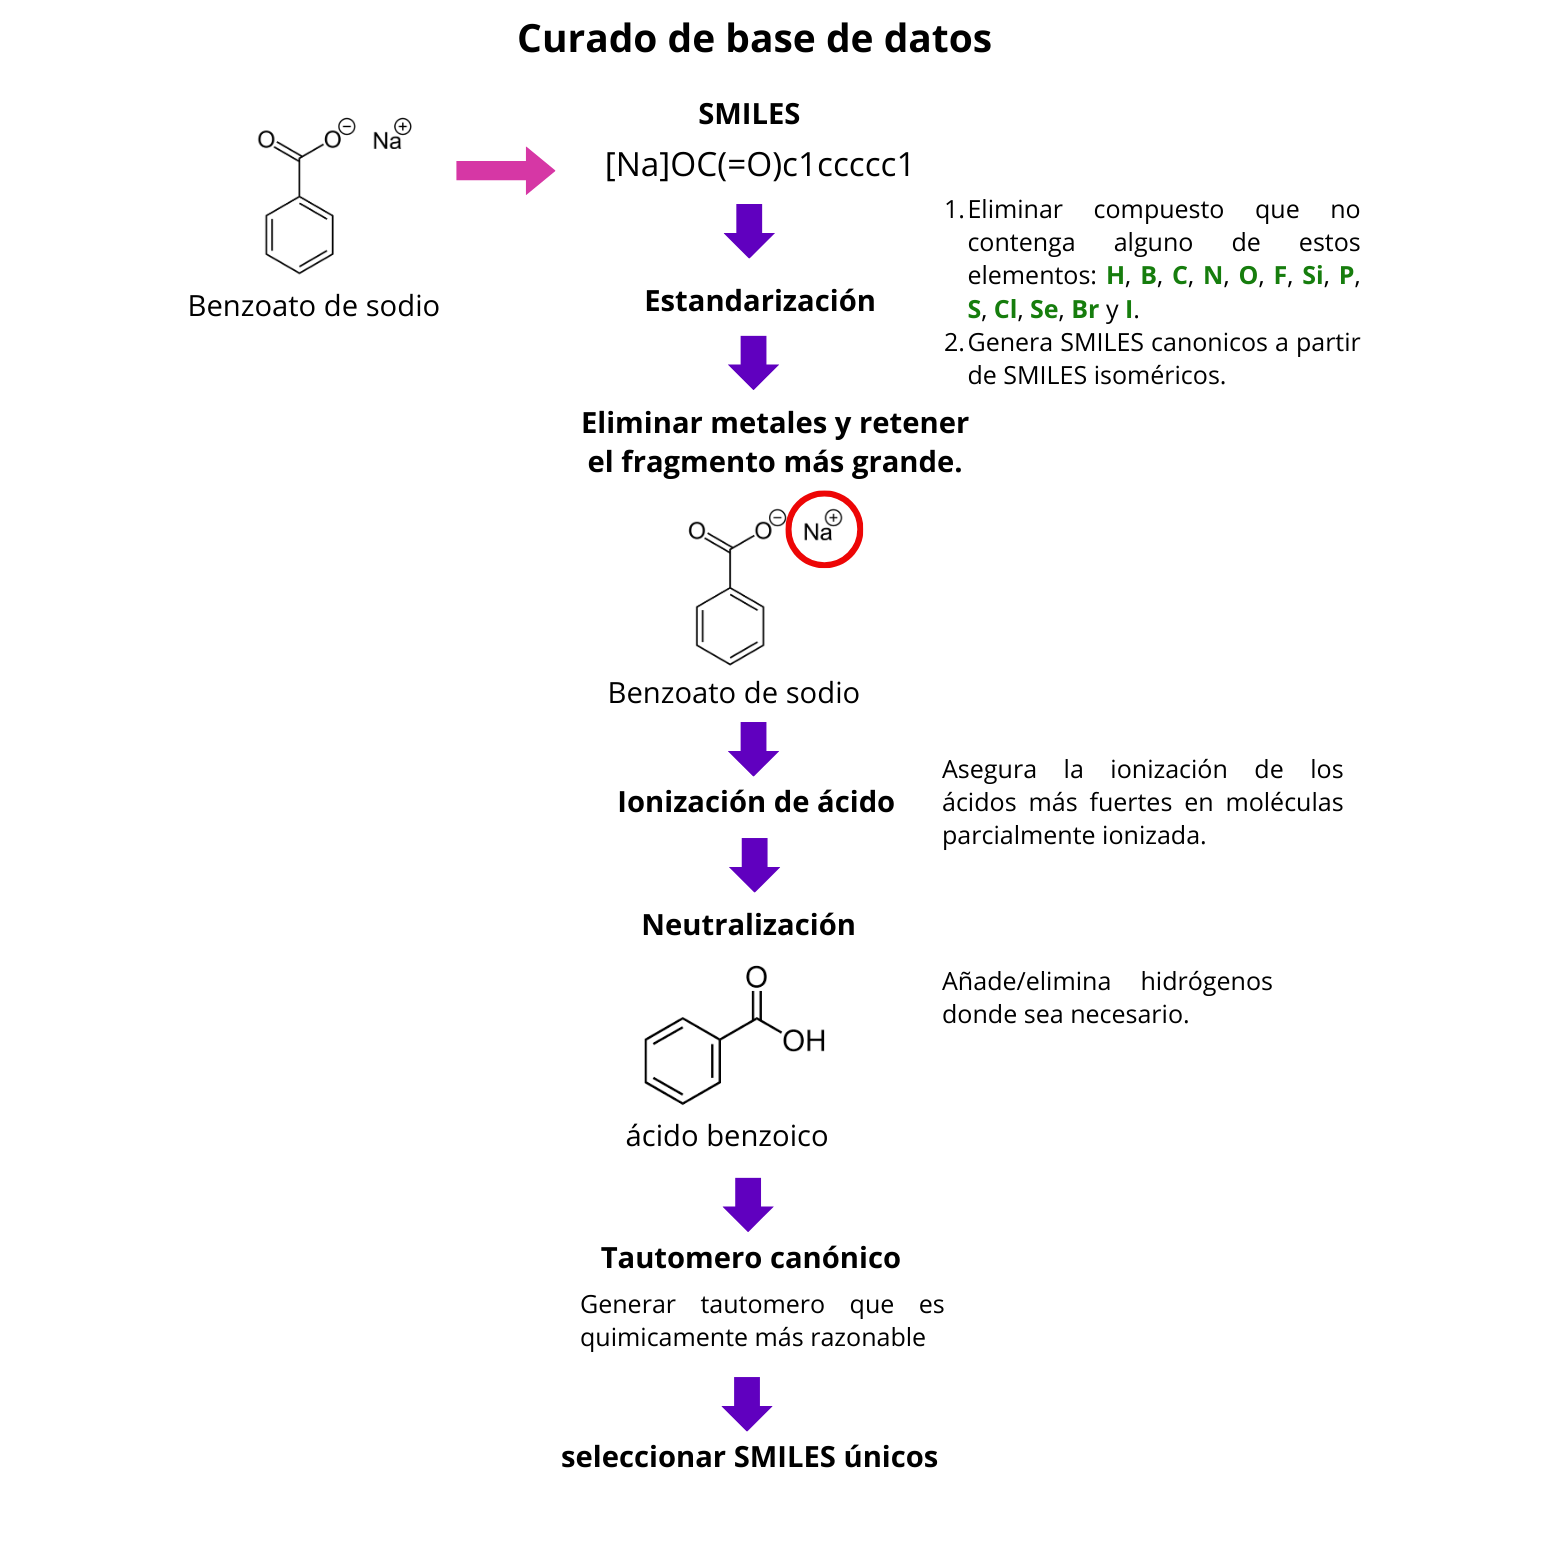

#Preparación del entorno

In [1]:
#Instalar RDKit
!pip install -q rdkit

In [2]:
#Instalar MolVS
!pip install -q molvs

In [3]:
#Instalar Rectifier, requiere RDKit
!pip install molecular-rectifier

In [4]:
#Importar librerías necesarias
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import MolStandardize
from rdkit.Chem import rdmolops
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry
from molecular_rectifier import Rectifier

#Molecular Rectifier

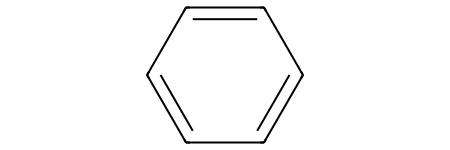

In [5]:
mol = Chem.MolFromSmiles("C1=CC=CC=C1", sanitize=False)
mol

In [6]:
recto = Rectifier(mol, valence_correction='charge')
recto.fix_issues()  # Rectifica valencias
fixed_mol = recto.mol
Chem.SanitizeMol(fixed_mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL)
Chem.MolToSmiles(fixed_mol)

'c1ccccc1'

In [7]:
mol = Chem.MolFromSmiles("c1cccn(C)c1")
mol

[05:31:46] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6


In [8]:
mol = Chem.MolFromSmiles("c1cccn(C)c1", sanitize=False)
Chem.MolToSmiles(mol)

'Cn1ccccc1'

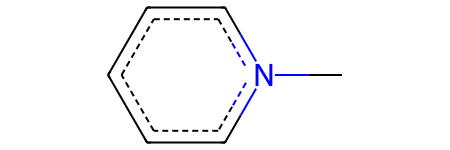

In [9]:
mol

In [10]:
recto = Rectifier(mol, valence_correction='charge')
recto.fix_issues()
fixed_mol = recto.mol
Chem.SanitizeMol(fixed_mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL)
Chem.MolToSmiles(fixed_mol)

[05:31:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[05:31:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[05:31:52] Explicit valence for atom # 4 N, 5, is greater than permitted
[05:31:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[05:31:52] Explicit valence for atom # 4 N, 5, is greater than permitted
[05:31:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6


'C[n+]1ccccc1'

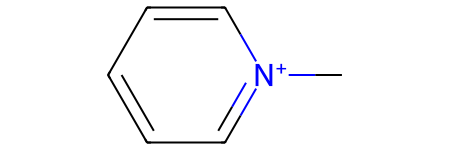

In [11]:
fixed_mol

#Funciones MolVS

In [12]:
#Definir funciones
STD = Standardizer() # Versión estandarizada de la notación SMILES.
LFC = LargestFragmentChooser() # Selecciona el fragmento más grande en el caso de sales.
UC = Uncharger() # Añade/elimina hidrógenos para neutralizar la molécula.
RI = Reionizer() # Ionizar primero al ácido más fuerte.
TC = TautomerCanonicalizer()  # Tautómero canónico.

##*Standardizer*

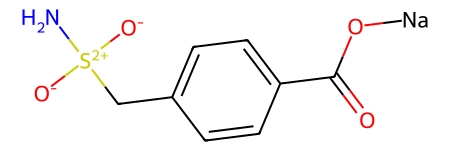

In [13]:
mol = Chem.MolFromSmiles('N[S++]([O-])([O-])Cc1ccc(cc1)C(=O)O[Na]')
mol

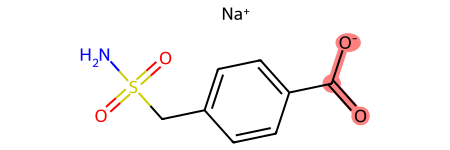

In [14]:
smol = STD(mol)
smol

##*Largest Fragment Chooser*

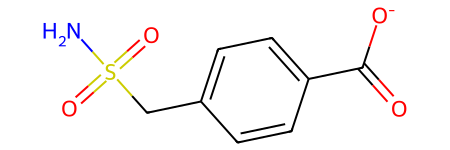

In [15]:
lmol = LFC(smol)
lmol

##*Uncharger*

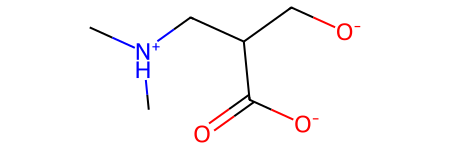

In [16]:
mol2 = Chem.MolFromSmiles('[O-]CC(C(=O)[O-])C[NH+](C)C')
mol2

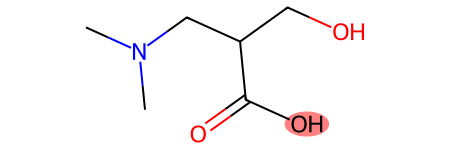

In [17]:
umol2 = UC(mol2)
umol2

##*Reionizer*

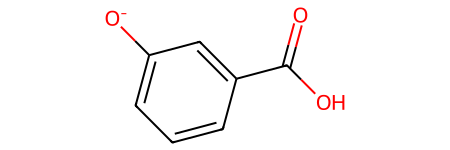

In [18]:
mol3 = Chem.MolFromSmiles('c1ccc([O-])cc1C(=O)O')
mol3

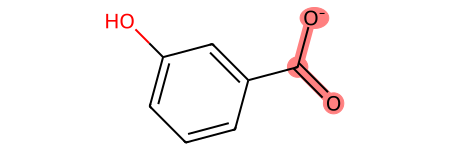

In [19]:
rmol3 = RI(mol3)
rmol3

##*Tautomer Canonicalizer*

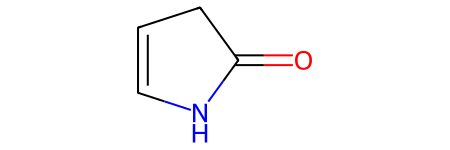

In [20]:
mol4 = Chem.MolFromSmiles('O=C1CC=CN1')
mol4

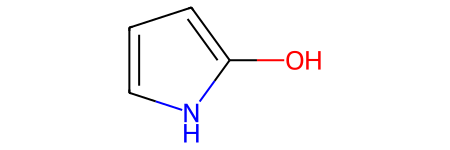

In [21]:
tmol4 = TC(mol4)
tmol4

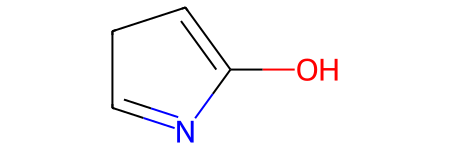

In [22]:
mol5 = Chem.MolFromSmiles('OC1=CCC=N1')
mol5

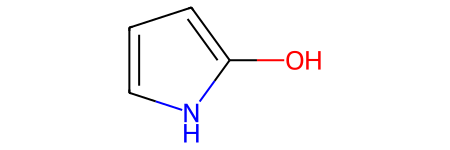

In [23]:
tmol5 = TC(mol5)
tmol5

#Base de datos

In [30]:
#Cargar base de datos
url ="https://github.com/DIFACQUIM/Cursos/raw/main/Datasets/chembl_search_output_xlsx.xlsx"
df = pd.read_excel(url, index_col=0)  #Archivo formato excel
df.head(2) # Muestra las dos primeras filas de información, para verificar que cargó la información correctamente

,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_properties,molecule_structures,molecule_type,oral,parenteral,pref_name,...,document_chembl_id,document_journal,ligand_efficiency,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,units,value
0,1986.0,Inhibitor (beta-lactamase); Synergist (penicil...,4.0,CHEMBL403,"{'alogp': '-0.79', 'aromatic_rings': 0, 'cx_lo...",{'canonical_smiles': 'CC1(C)[C@H](C(=O)O)N2C(=...,Small molecule,False,True,SULBACTAM,...,CHEMBL5154912,J Med Chem,NaN,nM,50000.0,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,uM,50.0
1,1950.0,Antibacterial,4.0,CHEMBL421,"{'alogp': '3.70', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'O=C(O)c1cc(/N=N/c2ccc(S(...,Small molecule,True,False,SULFASALAZINE,...,CHEMBL4392846,Bioorg Med Chem,"{'bei': '12.85', 'le': '0.25', 'lle': '1.42', ...",nM,7600.0,CHEMBL4295557,Middle East respiratory syndrome-related coron...,Replicase polyprotein 1ab,uM,7.6


In [ ]:
# Para cargar archivos sdf
#df = PandasTools.LoadSDF ('<ruta_archivo>', embedProps=True, molColName=None, smilesName='smiles')
#df

In [31]:
#Imprimir columnas del dataframe
print(df.columns)

Index(['first_approval', 'indication_class', 'max_phase', 'molecule_chembl_id',
       'molecule_properties', 'molecule_structures', 'molecule_type', 'oral',
       'parenteral', 'pref_name', 'topical', 'canonical_smiles', 'activity_id',
       'assay_chembl_id', 'assay_description', 'document_chembl_id',
       'document_journal', 'ligand_efficiency', 'standard_units',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'units', 'value'],
      dtype='object')


In [32]:
#Seleccionar columnas de interés
data = df[['first_approval', 'indication_class', 'max_phase', 'molecule_chembl_id', 'oral', 'parenteral', 'topical',
               'pref_name', 'canonical_smiles', 'target_chembl_id', 'target_organism']]
data

,first_approval,indication_class,max_phase,molecule_chembl_id,oral,parenteral,topical,pref_name,canonical_smiles,target_chembl_id,target_organism
0,1986.0,Inhibitor (beta-lactamase); Synergist (penicil...,4.0,CHEMBL403,False,True,False,SULBACTAM,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2
1,1950.0,Antibacterial,4.0,CHEMBL421,True,False,False,SULFASALAZINE,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,CHEMBL4295557,Middle East respiratory syndrome-related coron...
2,1945.0,Antibacterial,4.0,CHEMBL437,False,False,True,SULFATHIAZOLE,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2
3,NaN,NaN,3.0,CHEMBL50,False,False,False,QUERCETIN,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,CHEMBL5118,SARS coronavirus
4,1949.0,"Anti-Amebic; Antimalarial,Anti-Amebic; Suppres...",4.0,CHEMBL76,True,True,False,CHLOROQUINE,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,CHEMBL4662936,Severe acute respiratory syndrome coronavirus 2
5,1982.0,"Anti-Amebic; Anti-Infective, Topical",4.0,CHEMBL497,False,False,True,CLIOQUINOL,Oc1c(I)cc(Cl)c2cccnc12,CHEMBL4662936,Severe acute respiratory syndrome coronavirus 2
6,1980.0,Anti-Inflammatory,4.0,CHEMBL509,True,False,False,MECLOFENAMIC ACID,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl,CHEMBL3927,SARS coronavirus
7,1958.0,Antibacterial,4.0,CHEMBL615,True,False,False,PENICILLIN V,CC1(C)S[C@@H]2[C@H](NC(=O)COc3ccccc3)C(=O)N2[C...,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2
8,1966.0,Antineoplastic,4.0,CHEMBL727,True,False,False,THIOGUANINE,Nc1nc2[nH]cnc2c(=S)[nH]1,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2
9,2000.0,NaN,4.0,CHEMBL729,True,False,False,LOPINAVIR,Cc1cccc(C)c1OCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)...,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2


In [33]:
#Cambiar nombre de columnas
data.columns = ['First Approval', 'Indication', 'Max Phase', 'Molecule ChEMBL ID', 'Oral', 'Parenteral', 'Topical',
              'Name', 'Smiles', 'Target ChEMBL ID', 'Organism']

In [34]:
data.tail(2) #Ver últimas dos filas de datos

,First Approval,Indication,Max Phase,Molecule ChEMBL ID,Oral,Parenteral,Topical,Name,Smiles,Target ChEMBL ID,Organism
27,2020.0,NaN,4.0,CHEMBL4065616,False,True,False,REMDESIVIR,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2
28,NaN,NaN,3.0,CHEMBL4802135,False,False,False,NIRMATRELVIR,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,CHEMBL4888440,Human coronavirus 229E


In [35]:
#Información del número de filas y columnas
data.shape

(29, 11)

#Curado de toda la base de datos

In [36]:
#Función para curado
def pretreatment(smi):
    try:
        mol = Chem.MolFromSmiles(smi, sanitize=False)
        if mol == None:
            #Error 1 en caso de que RDKit no lea el SMILES.
            return "Error 1"
        else:
            recto = Rectifier(mol, valence_correction='charge')
            recto.fix_issues()  # Rectificar valencias.
            fixed_mol = recto.mol
            Chem.SanitizeMol(fixed_mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL)

            fixed_mol = Chem.RemoveHs(fixed_mol) #Eliminar hidrógenos.

            fixed_mol = Chem.MolStandardize.rdMolStandardize.DisconnectOrganometallics(fixed_mol) #Romper enlaces con metales (sales).
            fixed_mol = Chem.MolStandardize.rdMolStandardize.Normalize(fixed_mol) #Estandarizar representación (como sulfonamidas).

            fixed_mol = LFC(fixed_mol) #Mantener fragmento más grande.


            allowed_elements = {"H","B","C","N","O","F","Si","P","S","Cl","Se","Br","I"} #Átomos permitidos.
            actual_elements = set([atom.GetSymbol() for atom in fixed_mol.GetAtoms()])
            if len(actual_elements-allowed_elements) == 0:
                fixed_mol = UC(fixed_mol) #Verificar cargas.
                fixed_mol = RI(fixed_mol)
                #RemoveStereochemistry(mol)
                return Chem.MolToSmiles(fixed_mol)
            else:
                # Error 2 si hay otros átomos.
                return "Error 2"

    except:
        return "Something else was found"

In [37]:
#Nueva columna de SMILES
data["NEW_SMILES"] = [pretreatment(x) for x in data["Smiles"]]
data.head()

[05:38:28] Initializing MetalDisconnector
[05:38:28] Running MetalDisconnector
[05:38:28] Initializing Normalizer
[05:38:28] Running Normalizer
[05:38:28] Initializing MetalDisconnector
[05:38:28] Running MetalDisconnector
[05:38:28] Initializing Normalizer
[05:38:28] Running Normalizer
[05:38:28] Initializing MetalDisconnector
[05:38:28] Running MetalDisconnector
[05:38:28] Initializing Normalizer
[05:38:28] Running Normalizer
[05:38:29] Initializing MetalDisconnector
[05:38:29] Running MetalDisconnector
[05:38:29] Initializing Normalizer
[05:38:29] Running Normalizer
[05:38:29] Initializing MetalDisconnector
[05:38:29] Running MetalDisconnector
[05:38:29] Initializing Normalizer
[05:38:29] Running Normalizer
[05:38:29] Initializing MetalDisconnector
[05:38:29] Running MetalDisconnector
[05:38:29] Initializing Normalizer
[05:38:29] Running Normalizer
[05:38:29] Initializing MetalDisconnector
[05:38:29] Running MetalDisconnector
[05:38:29] Initializing Normalizer
[05:38:29] Running Nor

,First Approval,Indication,Max Phase,Molecule ChEMBL ID,Oral,Parenteral,Topical,Name,Smiles,Target ChEMBL ID,Organism,NEW_SMILES
0,1986.0,Inhibitor (beta-lactamase); Synergist (penicil...,4.0,CHEMBL403,False,True,False,SULBACTAM,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O
1,1950.0,Antibacterial,4.0,CHEMBL421,True,False,False,SULFASALAZINE,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,CHEMBL4295557,Middle East respiratory syndrome-related coron...,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...
2,1945.0,Antibacterial,4.0,CHEMBL437,False,False,True,SULFATHIAZOLE,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1
3,NaN,NaN,3.0,CHEMBL50,False,False,False,QUERCETIN,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,CHEMBL5118,SARS coronavirus,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
4,1949.0,"Anti-Amebic; Antimalarial,Anti-Amebic; Suppres...",4.0,CHEMBL76,True,True,False,CHLOROQUINE,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,CHEMBL4662936,Severe acute respiratory syndrome coronavirus 2,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12


In [38]:
# Eliminar smiles no leído por RDKit
data = data[data["NEW_SMILES"] != "Error 1"]
# Eliminar smiles que contiene átomos no permitidos
data = data[data["NEW_SMILES"] != "Error 2"]
# Eliminar otros errores
data = data[data["NEW_SMILES"] != "Something else was found"].reset_index(drop=True)

In [ ]:
# Eliminar duplicados
data = data.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(data.shape)
data.head(2)

(29, 12)


,First Approval,Indication,Max Phase,Molecule ChEMBL ID,Oral,Parenteral,Topical,Name,Smiles,Target ChEMBL ID,Organism,NEW_SMILES
0,1986.0,Inhibitor (beta-lactamase); Synergist (penicil...,4.0,CHEMBL403,False,True,False,SULBACTAM,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,CHEMBL4523582,Severe acute respiratory syndrome coronavirus 2,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O
1,1950.0,Antibacterial,4.0,CHEMBL421,True,False,False,SULFASALAZINE,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,CHEMBL4295557,Middle East respiratory syndrome-related coron...,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...


In [39]:
# Guardar dataframe como archivo csv
data.to_csv("chembl_search_output_curada.csv", sep=",", index=False)

In [ ]:
#Función para curado, versión 1
def pretreatment(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        if mol == None:
            #If rdkit could not parse the smiles, returns Error 1
            return "Error 1"
        else:
            mol = STD(mol)
            mol = LFC(mol)

            allowed_elements = {"H","B","C","N","O","F","Si","P","S","Cl","Se","Br","I"}
            actual_elements = set([atom.GetSymbol() for atom in mol.GetAtoms()])
            if len(actual_elements-allowed_elements) == 0:
                mol = UC(mol)
                mol = RI(mol)
                #RemoveStereochemistry(mol)
                mol = TC(mol)
                return Chem.MolToSmiles(mol)
            else:
                # If molecule contains other than the allowed elements, return "Error 2"
                return "Error 2"
    except:
        return "Something else was found"

##Para saber más:

[*Pre-Processing Molecules*](https://portal.valencelabs.com/datamol/post/solving-for-complex-onboarding-paving-a-path-to-value-for-your-customers-zw1rSUlpxArKiiu)

[MolStandardize](https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb)

[Combining IC50 or Ki Values from Different Sources Is a Source of Significant Noise](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00049?s=08)